<a href="https://colab.research.google.com/github/rajoy99/PyTorch_Basics/blob/master/chapter2_ResNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from torchvision import models

In [ ]:
dir(models)

In [3]:
resnet= models.resnet101(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /root/.cache/torch/hub/checkpoints/resnet101-5d3b4d8f.pth


In [ ]:
resnet

<h2>Pre Processing the data before feeding into the Network </h2>

In [5]:
from torchvision import transforms 

preprocess = transforms.Compose([
transforms.Resize(256),
transforms.CenterCrop(224),
transforms.ToTensor(),
transforms.Normalize(
mean=[0.485, 0.456, 0.406],
std=[0.229, 0.224, 0.225]
)])



In [7]:
from PIL import Image
img = Image.open("001.jpg")

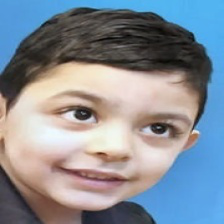

In [8]:
img

In [9]:
# Transforming Image

img_t= preprocess(img)
type(img_t)

torch.Tensor

In [10]:
import torch 
batch_t= torch.unsqueeze(img_t,0)


In [ ]:
resnet.eval()

In [12]:
out=resnet(batch_t)

In [ ]:
out

In [18]:
_,index=torch.max(out,1)

In [14]:
with open('imagenet_classes.txt') as f:
  labels = [line.strip() for line in f.readlines()]

In [16]:
len(labels)

1000

<h2># Determining the Class  </h2>

In [47]:


labels[index[0]]

'400: "academic gown, academic robe, judge\'s robe",'

In [48]:
# Determining Confidence 

percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100

len(percentage)
percentage[index[0]]

tensor(6.6337, grad_fn=<SelectBackward>)

In [41]:
len(percentage)

1000

In [49]:
percentage= torch.sort(percentage)

In [45]:
percentage.shape

torch.Size([1000])

In [52]:
percentage= percentage*100

In [54]:
percentage[-10:-1]

(tensor([1.0625e-04, 1.0962e-04, 1.1306e-04, 1.3144e-04, 1.3600e-04, 1.4227e-04,
         1.4711e-04, 1.5581e-04, 1.5706e-04, 1.5793e-04, 1.6556e-04, 1.7000e-04,
         1.7023e-04, 1.7059e-04, 1.7254e-04, 1.8288e-04, 1.8644e-04, 1.8883e-04,
         1.9017e-04, 1.9781e-04, 2.1159e-04, 2.3248e-04, 2.3251e-04, 2.3256e-04,
         2.3627e-04, 2.4771e-04, 2.8422e-04, 2.8659e-04, 2.8780e-04, 2.9149e-04,
         3.0703e-04, 3.1091e-04, 3.1824e-04, 3.2416e-04, 3.2490e-04, 3.2626e-04,
         3.3170e-04, 3.3201e-04, 3.3388e-04, 3.3494e-04, 3.3580e-04, 3.3608e-04,
         3.3710e-04, 3.3741e-04, 3.4222e-04, 3.4529e-04, 3.4637e-04, 3.4646e-04,
         3.4882e-04, 3.6859e-04, 3.6907e-04, 3.7177e-04, 3.8088e-04, 3.8752e-04,
         3.9351e-04, 4.0107e-04, 4.0137e-04, 4.0174e-04, 4.0311e-04, 4.0476e-04,
         4.0495e-04, 4.0541e-04, 4.1026e-04, 4.1250e-04, 4.1477e-04, 4.1857e-04,
         4.1877e-04, 4.2221e-04, 4.2403e-04, 4.3758e-04, 4.5302e-04, 4.5636e-04,
         4.5728e-04, 4.5887e